In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')


In [7]:
import seaborn as sns

In [2]:
data = pd.read_csv('D:\Data\kaggle datasets\movie_IMDB.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

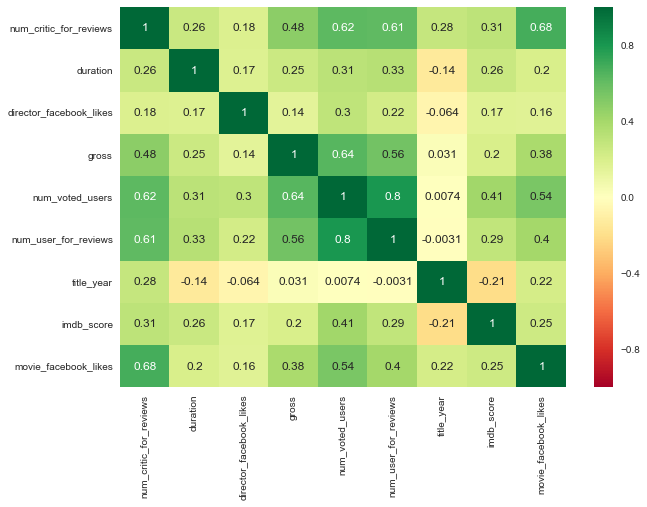

In [9]:
# most correlated features
corrmat = data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
data_null = data.isnull().sum()
data_null = data_null[data_null>0]
data_null.sort_values(ascending=False)[:10]

gross                      884
budget                     492
aspect_ratio               329
content_rating             303
plot_keywords              153
title_year                 108
director_name              104
director_facebook_likes    104
num_critic_for_reviews      50
actor_3_facebook_likes      23
dtype: int64

In [13]:
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.00
num_voted_users              0.41
num_critic_for_reviews       0.31
num_user_for_reviews         0.29
duration                     0.26
movie_facebook_likes         0.25
gross                        0.20
director_facebook_likes      0.17
cast_total_facebook_likes    0.09
actor_2_facebook_likes       0.08
actor_1_facebook_likes       0.08
aspect_ratio                 0.06
actor_3_facebook_likes       0.05
budget                       0.03
facenumber_in_poster        -0.06
title_year                  -0.21
Name: imdb_score, dtype: float64


In [14]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index([u'color', u'director_name', u'actor_2_name', u'genres', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'plot_keywords', u'movie_imdb_link',
       u'language', u'country', u'content_rating'],
      dtype='object')

In [16]:
numerical_features = datacategorical_features.size,numerical_features.size.select_dtypes(exclude=['object']).columns
numerical_features

Index([u'num_critic_for_reviews', u'duration', u'director_facebook_likes',
       u'actor_3_facebook_likes', u'actor_1_facebook_likes', u'gross',
       u'num_voted_users', u'cast_total_facebook_likes',
       u'facenumber_in_poster', u'num_user_for_reviews', u'budget',
       u'title_year', u'actor_2_facebook_likes', u'imdb_score',
       u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [17]:
categorical_features.size,numerical_features.size

(12, 16)

In [18]:
numerical_features = numerical_features.drop("imdb_score")

In [19]:
num_data = data[numerical_features]
cat_data = data[categorical_features]

In [23]:
print("NAs for numerical features in whole data : " + str(num_data.isnull().values.sum()))
num_data = num_data.fillna(num_data.mean())
print("Remaining NAs for numerical features in train : " + str(num_data.isnull().values.sum()))

NAs for numerical features in whole data : 2059
Remaining NAs for numerical features in train : 0


In [24]:
from scipy.stats import skew 
skewness = num_data.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness.index

Index([u'num_critic_for_reviews', u'duration', u'director_facebook_likes',
       u'actor_3_facebook_likes', u'actor_1_facebook_likes', u'gross',
       u'num_voted_users', u'cast_total_facebook_likes',
       u'facenumber_in_poster', u'num_user_for_reviews', u'budget',
       u'title_year', u'actor_2_facebook_likes', u'aspect_ratio',
       u'movie_facebook_likes'],
      dtype='object')

In [25]:
skew_features = num_data[skewness.index]
skew_features  = np.log1p(skew_features)
num_data[skewness.index] = skew_features

In [29]:
cat_data = data[categorical_features]

In [30]:
df_genres = pd.DataFrame(cat_data['genres'])
# genre_labels = set()
# for s in data['genres'].str.split('|').values:
#     genre_labels = genre_labels.union(set(s))

df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )
cat_data.drop('genres',inplace = True, axis = 1)

cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [31]:
cat_data.shape

(5043, 19)

In [32]:
cat_data = pd.get_dummies(cat_data)

In [34]:
cat_data.shape

(5043, 25898)

### This is Crazy

In [19]:
# data.rename(columns = {'director_facebook_likes':'dir_fb_likes','actor_1_facebook_likes':'actor_1_fb','actor_3_facebook_likes':'actor_3_fb','actor_2_facebook_likes':'actor_2_fb'},inplace = True)

# import seaborn as sns 
# plt.figure(figsize=(14,4))
# sns.countplot(num_data['gross'],label='imdb_score')
# plt.show()

# fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(16,15))
# sns.boxplot(x= 'imdb_score',data = data,orient = 'v',saturation = 1, ax = ax[0,0])
# sns.boxplot(x= 'gross',data = data,orient = 'v',saturation = 1, ax = ax[0,1])
# sns.boxplot(x= 'budget',data = data,orient = 'v',saturation = 1, ax = ax[1,0])
# sns.boxplot(x= 'movie_facebook_likes',data = data,orient = 'v',saturation = 1, ax = ax[1,1])
# sns.boxplot(x= 'cast_total_facebook_likes',data = data,orient = 'v',saturation = 1, ax = ax[2,0])
# sns.boxplot(x= 'dir_fb_likes',data = data,orient = 'v',saturation = 1, ax = ax[2,1])
# sns.boxplot(x= 'actor_1_fb',data = data,orient = 'v',saturation = 1, ax = ax[3,0])

# fig.tight_layout()


# fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,15))
# data1 = data[np.abs(data.imdb_score-data.imdb_score.mean())<=(2*data.imdb_score.std())]
# data2 = data[np.abs(data.imdb_score-data.imdb_score.mean())<=(2*data.imdb_score.std())]

# ax[0,0].hist(data1['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2)
# ax[0,1].hist(data2['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2)

# # plt.hist(data2['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2,ax  = ax[0,1])

# plt.scatter(data1['gross'],data1['imdb_score'])
# plt.show()


# plt.xlabel('IMDB SCORE')
# plt.ylabel('% of Movies')
# plt.hist(data['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2)

# #sns.boxplot(x= 'budget',data = data,orient = 'v',saturation = 1)
# plt.xlabel('budget')
# plt.ylabel('No of Movies')
# plt.hist(data['budget'],edgecolor='black')

# plt.xlabel('dir_fb_likes')
# plt.ylabel('No of Movies')
# plt.hist(data['dir_fb_likes'],edgecolor='black')

# data.head()

# plt.scatter(data['dir_fb_likes'],data['imdb_score'])
# plt.show()

# plt.scatter(data['budget'],data['imdb_score'])
# plt.show()

# data.head(1)

# a = data.groupby('language').agg({'imdb_score':'mean'}).reset_index().sort_values(by = 'imdb_score',ascending = False)


# plt.figure(figsize=(16,6))
# sns.barplot(x="language", y="imdb_score", data=a)

# b = data.groupby(['Genre_0']).agg({'imdb_score':'mean'}).reset_index().sort_values(by = 'imdb_score',ascending = False)[:20
#                                                                                                    ]
# b= b.round(2)

# plt.figure(figsize=(15,6))
# sns.barplot(x="Genre_0", y="imdb_score", data=b)

# c = data.groupby('Director').agg({'gross':'mean'}).reset_index().sort_values(by = 'gross',ascending = False)[:15]
# c.columns

# plt.figure(figsize=(15,6))
# sns.barplot(x="Director", y="gross", data=c)

# d = data.groupby('content_rating').agg({'imdb_score':'mean'}).reset_index().sort_values(by = 'imdb_score',ascending = False)[:15]
# plt.figure(figsize=(15,6))
# sns.barplot(x="content_rating", y="imdb_score", data=d)

# # f, (ax1, ax2) = plt.subplots(2)
# # f.set_size_inches(15, 10)
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15))
# sns.barplot(x="content_rating", y="imdb_score", data=d,ax = axes[1])
# sns.barplot(x="language", y="imdb_score", data=a,ax = axes[0])
# sns.barplot(x="Director", y="gross", data=c,ax = axes[2])
# fig.tight_layout()


# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(12, 10))
# plt.title('Pearson Correlation of Movie Features')
# # Draw the heatmap using seaborn
# sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [42]:
cleaned = pd.concat([cat_data,num_data],axis=1)


In [43]:
cleaned.shape

(5043, 25913)

In [44]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(cleaned,data['imdb_score'], random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
#lasso_cv = LassoCV(alphas=alphas, random_state=0)
lasso_cv = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_train, y_train)
#lasso_cv.predict(X_test)